# Segmentation demonstration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fundus_lesions_toolkit.models import segment, list_models
from fundus_data_toolkit.functional import open_image
from fundus_data_toolkit.utils.visualization import plot_image, plot_image_and_mask
from fundus_lesions_toolkit.constants import DEFAULT_COLORS, LESIONS, Dataset

c:\Users\fix_e\anaconda3\envs\zoha3128\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


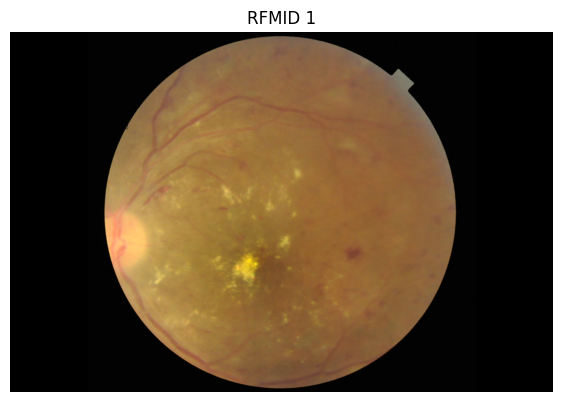

In [3]:
example_path = "../imgs/rfmid_sample_1.png"
img = open_image(example_path)
fsize = (7, 7)
plot_image(img, title="RFMID 1", figsize=fsize)

In [4]:
list_models()

Architecture |  Encoder |  Variants
unet seresnext50_32x4d  (31 variants)


c:\Users\fix_e\anaconda3\envs\zoha3128\Lib\site-packages\fundus_lesions_toolkit\models\segmentation.py:190: UserWarning: Setting dropout to 0.2
  warnings.warn(f"Setting dropout to {initial_value}")


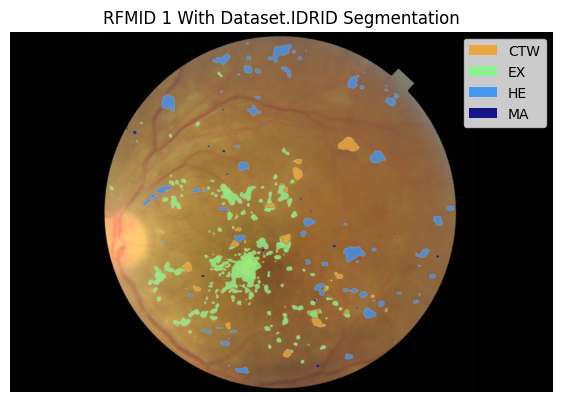

In [5]:
pred = segment(img, device="cpu", train_datasets=Dataset.IDRID, compile=False)
plot_image_and_mask(
    img,
    pred,
    alpha=0.8,
    title=f"RFMID 1 With {Dataset.IDRID} Segmentation",
    figsize=fsize,
    colors=DEFAULT_COLORS,
    labels=LESIONS,
)

c:\Users\fix_e\anaconda3\envs\zoha3128\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\fix_e\.cache\huggingface\hub\models--ClementP--fundus-lesions-segmentation-unet_seresnext50_32x4d. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Error while downloading from https://cdn-lfs-us-1.hf.co/repos/93/4c/93

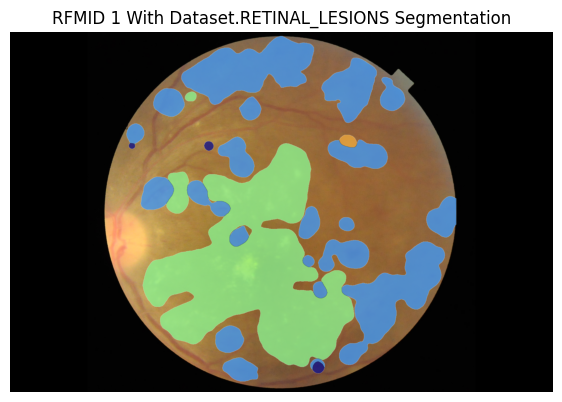

In [6]:
pred = segment(img, device="cpu", train_datasets=Dataset.RETINAL_LESIONS)
plot_image_and_mask(
    img,
    pred,
    alpha=0.8,
    title=f"RFMID 1 With {Dataset.RETLES} Segmentation",
    figsize=fsize,
    colors=DEFAULT_COLORS,
)  # No legend

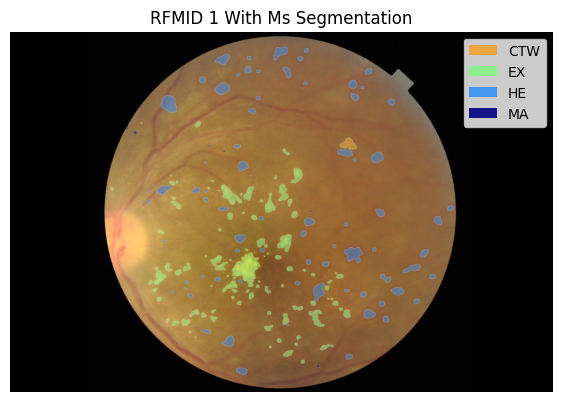

In [7]:
pred = segment(img, device="cpu", train_datasets=Dataset.ALL)
plot_image_and_mask(
    img,
    pred,
    alpha=0.5,
    title="RFMID 1 With Ms Segmentation",
    figsize=fsize,
    colors=DEFAULT_COLORS,
    labels=LESIONS,
)

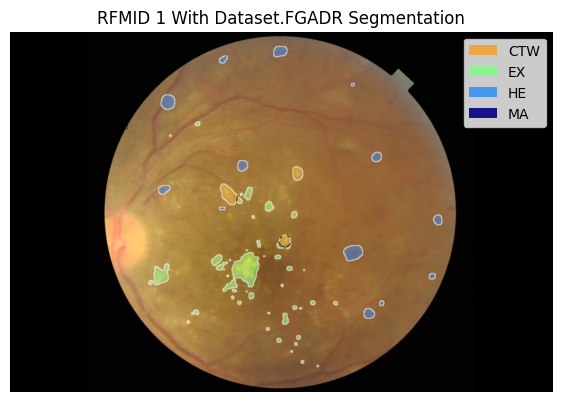

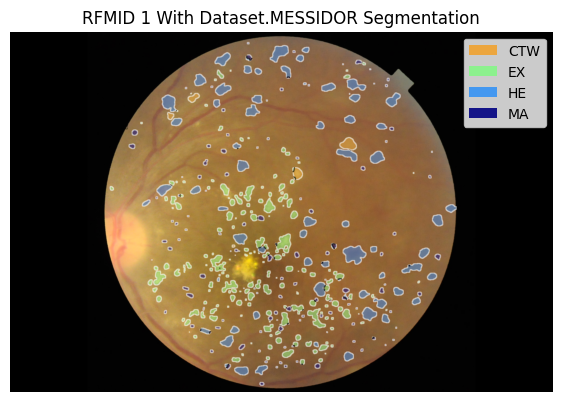

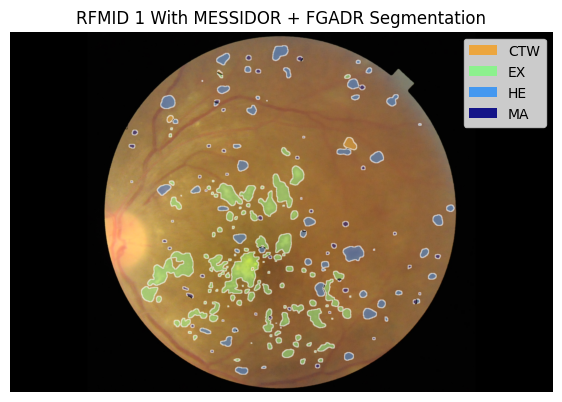

In [8]:
datasets = [Dataset.FGADR, Dataset.MESSIDOR, (Dataset.MESSIDOR, Dataset.FGADR)]
for d in datasets:
    pred = segment(img, device="cpu", train_datasets=d)
    if isinstance(d, tuple):
        d = " + ".join(d)
    plot_image_and_mask(
        img,
        pred,
        alpha=0.5,
        title=f"RFMID 1 With {d} Segmentation",
        border_width=5,
        border_alpha=0.4,
        figsize=fsize,
        colors=DEFAULT_COLORS,
        labels=LESIONS,
    )